In [161]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df=pd.read_csv("D:/ML Data/apple_news_data.csv")
df.head()

,date,title,content,link,symbols,tags,sentiment_polarity,sentiment_neg,sentiment_neu,sentiment_pos
0,2024-11-27T16:39:00+00:00,Berkshire Stock Hits Record Even as Company Re...,"Warren Buffett’s caution, his advancing age, a...",https://finance.yahoo.com/m/f5df3aa4-364b-31d6...,"0R2V.IL, AAPL.BA, AAPL.MX, AAPL.NEO, AAPL.SN, ...",NaN,0.0,0.0,1.0,0.0
1,2024-11-26T00:00:00+00:00,What Is a Stock Market Index?,What Is a Stock Market Index?,https://www.fool.com/investing/stock-market/in...,"AAPL.US, AMZN.US, MSFT.US",NaN,0.0,0.0,1.0,0.0
2,2024-11-26T00:00:00+00:00,"Could Investing $1,000 in Apple Make You a Mil...","Could Investing $1,000 in Apple Make You a Mil...",https://www.fool.com/investing/2024/11/26/coul...,AAPL.US,NaN,0.0,0.0,1.0,0.0
3,2024-11-26T00:00:00+00:00,Dow Jones Industrial Average,Dow Jones Industrial Average,https://www.fool.com/investing/stock-market/in...,"AAPL.US, AMGN.US, AMZN.US, CSCO.US, GOOG.US, G...",NaN,0.0,0.0,1.0,0.0
4,2024-11-26T00:00:00+00:00,What Is the S&P 500 Index?,What Is the S&P 500 Index?,https://www.fool.com/investing/stock-market/in...,"AAPL.US, AMZN.US, GOOG.US, GOOGL.US, META.US, ...",NaN,0.0,0.0,1.0,0.0


In [162]:
#filtering data for google headlines
filtered_df = df[
    df['symbols'].str.contains('GOOG|GOOGL', case=False, na=False) |
    df['title'].str.contains('Google|Alphabet', case=False, na=False)
]
filtered_df.head()
#len(filtered_df)

,date,title,content,link,symbols,tags,sentiment_polarity,sentiment_neg,sentiment_neu,sentiment_pos
3,2024-11-26T00:00:00+00:00,Dow Jones Industrial Average,Dow Jones Industrial Average,https://www.fool.com/investing/stock-market/in...,"AAPL.US, AMGN.US, AMZN.US, CSCO.US, GOOG.US, G...",NaN,0.000,0.000,1.000,0.000
4,2024-11-26T00:00:00+00:00,What Is the S&P 500 Index?,What Is the S&P 500 Index?,https://www.fool.com/investing/stock-market/in...,"AAPL.US, AMZN.US, GOOG.US, GOOGL.US, META.US, ...",NaN,0.000,0.000,1.000,0.000
34,2024-11-08T00:00:00+00:00,JPMorgan Nasdaq Equity Premium Income ETF (JEP...,JPMorgan Nasdaq Equity Premium Income ETF (JEP...,https://www.fool.com/investing/how-to-invest/e...,"AAPL.US, AMZN.US, AVGO.US, GOOG.US, META.US, M...",NaN,0.000,0.000,1.000,0.000
38,2024-11-06T10:39:53+00:00,Tech Stocks Gain But Apple and Meta Lag Behind...,The market looks to be broadly positive about ...,https://finance.yahoo.com/m/d1936d13-fc46-3a3a...,"0QYP.IL, 0R2V.IL, 0RIH.IL, 1FB.MI, 1GOOG.MI, 1...",NaN,0.141,0.060,0.842,0.097
53,2024-11-02T13:00:00+00:00,"When Facebook became Meta, Big Tech's AI spend...",Elon Musk says there will be more humanoid rob...,https://www.yahoo.com/tech/facebook-became-met...,"0R1O.IL, 0R2V.IL, 0RIH.IL, 1AMZN.MI, 1FB.MI, 1...",NaN,0.993,0.031,0.861,0.107


In [163]:
# Convert to date only
filtered_df.loc[:,'date'] = pd.to_datetime(filtered_df['date']).dt.date
filtered_df['date'].min(), filtered_df['date'].max()

(datetime.date(2018, 3, 16), datetime.date(2024, 11, 26))

In [164]:
# Ensuring that  date column is datetime.date and taking data from stock price data range
filtered_df = filtered_df.copy()
filtered_df['date'] = pd.to_datetime(filtered_df['date']).dt.date

start_date = pd.to_datetime('2022-01-01').date()
end_date   = pd.to_datetime('2024-11-26').date()

filtered_df = filtered_df[
    (filtered_df['date'] >= start_date) &
    (filtered_df['date'] <= end_date)
]

In [165]:
#one sentiment vector per day.
daily_sentiment = filtered_df.groupby('date').agg({
    'sentiment_polarity': 'mean',
    'sentiment_pos': 'sum',
    'sentiment_neg': 'sum',
    'sentiment_neu': 'sum'
}).reset_index()

In [166]:
#downloading google stock data for 3 years
import yfinance as yf

stock_df = yf.download(
    tickers='GOOG',   # or 'GOOGL'
    start='2022-01-01',
    end='2024-11-26'
)
#Targeting close price
stock_df=stock_df["Close"]["GOOG"]
print(stock_df.head(15))

[*********************100%***********************]  1 of 1 completed

Date
2022-01-03    143.994507
2022-01-04    143.341431
2022-01-05    136.628769
2022-01-06    136.527023
2022-01-07    135.984604
2022-01-10    137.542419
2022-01-11    138.975174
2022-01-12    140.593506
2022-01-13    138.095261
2022-01-14    138.745880
2022-01-18    135.275925
2022-01-19    134.642151
2022-01-20    132.512634
2022-01-21    129.123550
2022-01-24    129.401459
Name: GOOG, dtype: float64


In [167]:
#Shift or aggregate weekend sentiment to the next trading day (Monday)

daily_sentiment['date'] = pd.to_datetime(daily_sentiment['date'])

# Shift Saturday/Sunday sentiment to Monday
daily_sentiment['date'] = daily_sentiment['date'].apply(
    lambda d: d + pd.offsets.BDay(1) if d.weekday() >= 5 else d
)

daily_sentiment['date'] = daily_sentiment['date'].dt.date
#Multiple weekend days may map to the same Monday:
daily_sentiment = daily_sentiment.groupby('date').mean().reset_index()
daily_sentiment.head(15)

,date,sentiment_polarity,sentiment_pos,sentiment_neg,sentiment_neu
0,2022-01-03,0.633167,0.127,0.0105,1.8625
1,2022-01-04,0.933000,0.082,0.0480,0.8700
2,2022-01-05,0.509750,0.665,0.3250,7.0100
3,2022-01-06,0.232500,0.178,0.0990,1.7230
4,2022-01-07,0.679429,0.678,0.2280,6.0950
5,2022-01-10,0.894200,0.557,0.1460,4.2970
6,2022-01-11,0.846200,0.486,0.1610,4.3540
7,2022-01-12,0.989000,0.325,0.0880,2.5850
8,2022-01-13,0.948429,0.799,0.1770,6.0240
9,2022-01-14,0.840500,0.362,0.0090,1.6290


In [168]:
#merging both data sets
print(type(stock_df))

#converting to Data frame
stock_df = stock_df.to_frame(name='Close')
stock_df.reset_index(inplace=True)
print(type(stock_df))

#fixing date format
stock_df['Date'] = pd.to_datetime(stock_df['Date']).dt.date

<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>


In [169]:
#merging data from sentiment data set  and stock price data

final_df = pd.merge(
    stock_df,
    daily_sentiment,
    left_on='Date',
    right_on='date',
    how='left'
)

final_df.head(15)

final_df = final_df.drop(columns=['date'])

features = [
    'Close',
    'sentiment_polarity',
    'sentiment_pos',
    'sentiment_neg'
]

final_df[features] = final_df[features].fillna(0).astype(float)

final_df[features].isna().sum()

Close                 0
sentiment_polarity    0
sentiment_pos         0
sentiment_neg         0
dtype: int64

In [170]:
#selecting feature to use for our model
features = [
    'Close',
    'sentiment_polarity',
    'sentiment_pos',
    'sentiment_neg'
]

data = final_df[features].copy()


In [171]:
#creating train test split
split_idx = int(len(data) * 0.8)

train_data = data.iloc[:split_idx]
test_data  = data.iloc[split_idx:]

print(train_data.isna().sum())
print(test_data.isna().sum())

Close                 0
sentiment_polarity    0
sentiment_pos         0
sentiment_neg         0
dtype: int64
Close                 0
sentiment_polarity    0
sentiment_pos         0
sentiment_neg         0
dtype: int64


In [172]:
#scaling the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

train_scaled = scaler.fit_transform(train_data)
test_scaled  = scaler.transform(test_data)

train_scaled = pd.DataFrame(train_scaled, columns=features)
test_scaled  = pd.DataFrame(test_scaled, columns=features)

In [173]:
#creating a sliding window function for LSTM model
def create_sequences(data, window_size=30):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data.iloc[i:i+window_size].values)
        y.append(data.iloc[i+window_size]['Close'])
    return np.array(X), np.array(y)

In [174]:
window_size = 30

X_train, y_train = create_sequences(train_scaled, window_size)
X_test, y_test   = create_sequences(test_scaled, window_size)

In [175]:
#building  the LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [176]:
model = Sequential([
    LSTM(64, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.2),
    LSTM(32),
    Dropout(0.2),
    Dense(1)
])

model.compile(
    optimizer='adam',
    loss='mse'
)

model.summary()

C:\Users\prana\PyCharmMiscProject\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_8 (LSTM)                   │ (None, 30, 64)         │        17,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 30, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_9 (LSTM)                   │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,113 (117.63 KB)

 Trainable params: 30,113 (117.63 KB)

 Non-trainable params: 0 (0.00 B)

In [177]:
history = model.fit(
    X_train,
    y_train,
    epochs=30,
    batch_size=32,
    validation_split=0.1,
    verbose=1
)

Epoch 1/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0885 - val_loss: 0.0803
Epoch 2/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0168 - val_loss: 0.0082
Epoch 3/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0073 - val_loss: 0.0051
Epoch 4/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0063 - val_loss: 0.0045
Epoch 5/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0066 - val_loss: 0.0044
Epoch 6/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0064 - val_loss: 0.0057
Epoch 7/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0056 - val_loss: 0.0052
Epoch 8/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0059 - val_loss: 0.0046
Epoch 9/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0058 - val_loss: 0.0062
Epoch 10/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0053 - val_loss: 0.0042
Epoch 11/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0054 - val_loss: 0.0036
Epoch 12/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0

In [178]:
y_pred_scaled = model.predict(X_test)

dummy = np.zeros((len(y_pred_scaled), len(features)))
dummy[:, 0] = y_pred_scaled.flatten()

y_pred = scaler.inverse_transform(dummy)[:, 0]

dummy[:, 0] = y_test
y_test_actual = scaler.inverse_transform(dummy)[:, 0]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


In [179]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(y_test_actual, y_pred)
rmse = mean_squared_error(y_test_actual, y_pred)
mape = np.mean(np.abs((y_test_actual - y_pred) / y_test_actual)) * 100

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAPE: {mape:.2f}%")

MAE: 4.19
RMSE: 31.63
MAPE: 2.50%


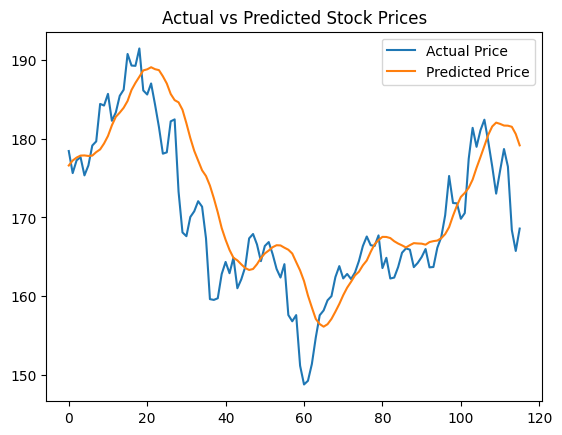

In [180]:
plt.figure()
plt.plot(y_test_actual, label='Actual Price')
plt.plot(y_pred, label='Predicted Price')
plt.legend()
plt.title('Actual vs Predicted Stock Prices')
plt.show()

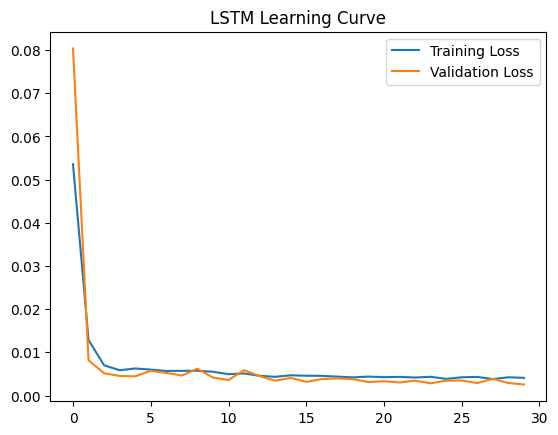

In [181]:
plt.figure()
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('LSTM Learning Curve')
plt.show()

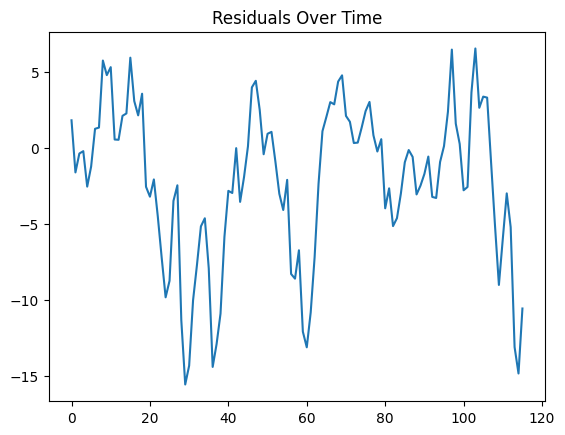

In [182]:
residuals = y_test_actual - y_pred

plt.figure()
plt.plot(residuals)
plt.title('Residuals Over Time')
plt.show()